In [1]:
#importing the libraries
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449691,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516598,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655558,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787854,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...,...
1998,2019-12-11,67.202499,67.775002,67.125000,67.692497,65.948196,78756800
1999,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.116241,137310400
2000,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.014969,133587600
2001,2019-12-16,69.250000,70.197502,69.245003,69.964996,68.162140,128186000


In [3]:
df.set_index('Date', inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449691,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516598,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655558,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787854,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.948196,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.116241,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.014969,133587600


In [4]:
df.shape

(2003, 6)

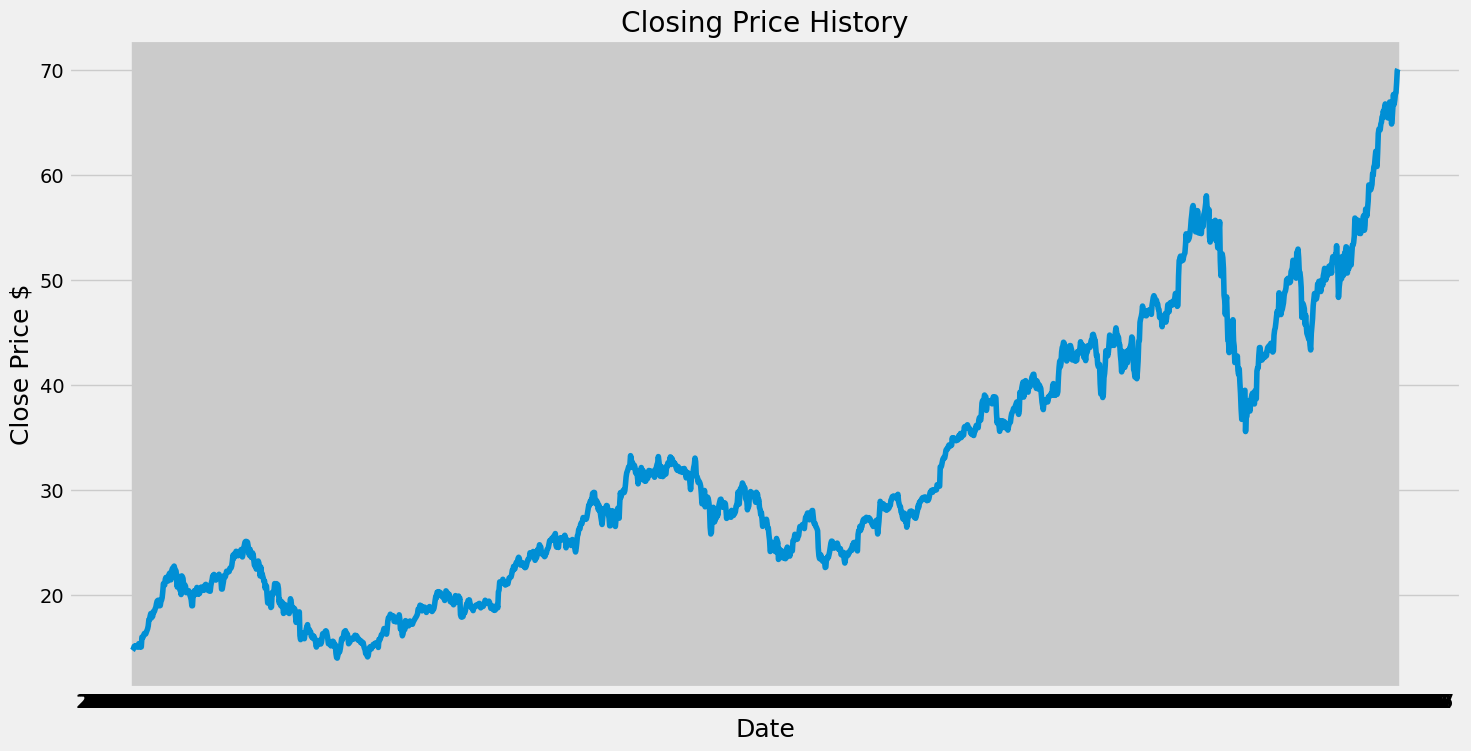

In [6]:
plt.figure(figsize = (16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price $', fontsize = 18)
plt.show()

In [7]:
data = df.filter(['Close'])
dataset = data.values
training_data_len   = math.ceil(len(dataset) * 0.8)
training_data_len

1603

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0131651 ],
       [0.01457063],
       [0.01748986],
       ...,
       [0.97658262],
       [0.99755133],
       [1.        ]])

In [9]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.0131651 , 0.01457063, 0.01748986, 0.02026915, 0.01984304,
       0.02080338, 0.02036454, 0.0196268 , 0.01862192, 0.02173194,
       0.02453667, 0.02367173, 0.01893356, 0.02345549, 0.01900353,
       0.03569839, 0.03440732, 0.03609271, 0.03973694, 0.04194383,
       0.04175942, 0.04107891, 0.04397904, 0.04670743, 0.0497984 ,
       0.05479095, 0.0652785 , 0.0654375 , 0.07127595, 0.07563886,
       0.0681405 , 0.07102789, 0.07097067, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600557, 0.09214292, 0.09661394,
       0.09790501, 0.0983566 , 0.09071196, 0.08886754, 0.08914104,
       0.09632779, 0.09835024, 0.10269409, 0.11293359, 0.12659476,
       0.12403805, 0.12404441, 0.13392141, 0.13701237, 0.1348118 ,
       0.13280208, 0.13070964, 0.13766104, 0.14243104, 0.14442806])]
[0.139492723007876]



In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1543, 60)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [14]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1543/1543 [==============================] - 20s 12ms/step - loss: 0.0010


In [15]:
test_data = scaled_data[training_data_len-60:, :]

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, 460):
    x_test.append(test_data[i-60:i, 0])
    if i <= 60:
        print(x_test)

[array([0.51322236, 0.51958863, 0.53294452, 0.54839283, 0.54581069,
       0.54460864, 0.53071854, 0.53610545, 0.53882115, 0.53815332,
       0.5308521 , 0.53935536, 0.5528893 , 0.56063573, 0.55284479,
       0.54603331, 0.54696817, 0.54416348, 0.53205414, 0.53178703,
       0.51411273, 0.503339  , 0.48593181, 0.52079068, 0.50106844,
       0.49278779, 0.49857536, 0.49367817, 0.50129106, 0.51562638,
       0.52092424, 0.50124656, 0.50868134, 0.5229276 , 0.51932153,
       0.52688985, 0.52951649, 0.53436918, 0.54514292, 0.5433621 ,
       0.52092424, 0.48940432, 0.48726739, 0.47702788, 0.48018872,
       0.48272637, 0.47426768, 0.4873564 , 0.50445199, 0.53770816,
       0.53913275, 0.57002937, 0.5759505 , 0.57991275, 0.5857448 ,
       0.59767603, 0.5912207 , 0.58926182, 0.58164901, 0.58939538])]


In [16]:
x_test = np.array(x_test)
x_test.shape

(400, 60)

In [17]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(400, 60, 1)

In [24]:
predictions = model.predict(x_test)
predictions[0:5,:]

13/13 [==============================] - 0s 8ms/step


array([[0.5627247 ],
       [0.56500185],
       [0.5660399 ],
       [0.56685084],
       [0.567258  ]], dtype=float32)

In [25]:
predictions = scaler.inverse_transform(predictions)
predictions[0:5,:]

array([[45.54731 ],
       [45.675182],
       [45.733475],
       [45.77901 ],
       [45.801876]], dtype=float32)

In [26]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.3795769111022949

/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_49419/1650639017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


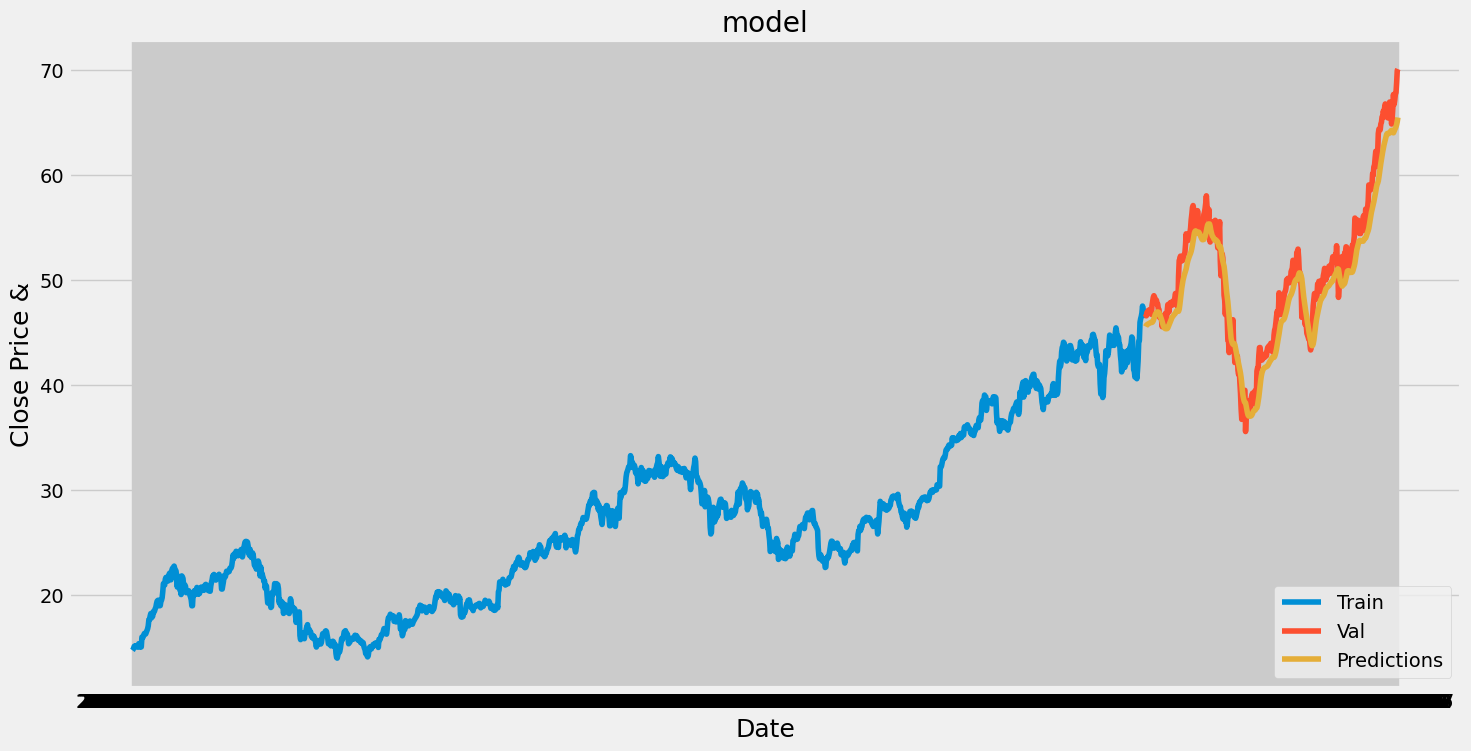

In [27]:
train = data[0:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title('model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price &', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [35]:
new_df = pd.read_csv('/Users/akshaykumar1239/Downloads/AAPL (2).csv')
new_df.set_index('Date', inplace = True)
new_df = new_df.filter(['Close'])

In [36]:
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

In [37]:
X_test = []

X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test.shape

(1, 60, 1)

In [33]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(1, 60, 1)

In [38]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 17ms/step


array([[65.902245]], dtype=float32)

In [ ]:
Price on 18-12-2019 : 69.93
Difference : 4.03